# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C://Users//Admin//Downloads//customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
#data shape
df.shape

(50000, 14)

In [9]:
for i in df.columns:
    print(i,'--->',df[i].nunique())

num_passengers ---> 9
sales_channel ---> 2
trip_type ---> 3
purchase_lead ---> 470
length_of_stay ---> 335
flight_hour ---> 24
flight_day ---> 7
route ---> 799
booking_origin ---> 104
wants_extra_baggage ---> 2
wants_preferred_seat ---> 2
wants_in_flight_meals ---> 2
flight_duration ---> 21
booking_complete ---> 2


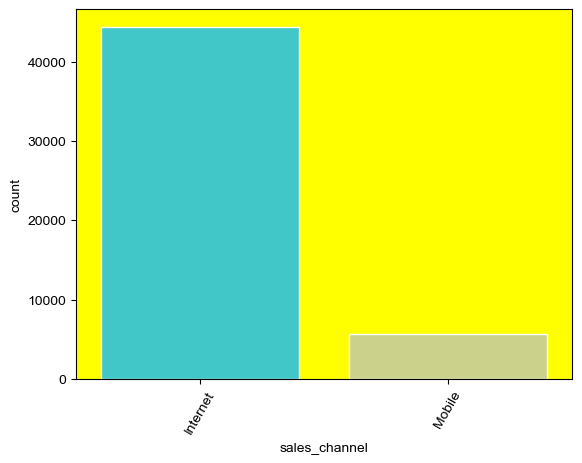

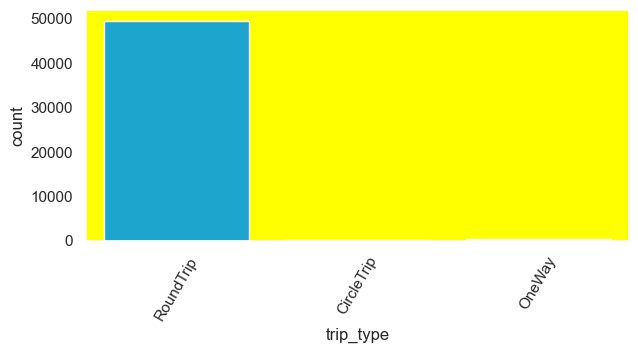

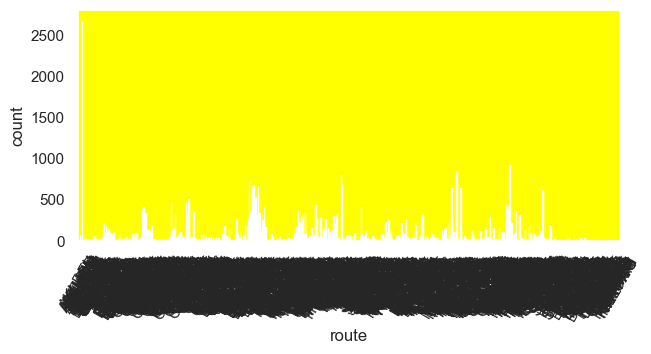

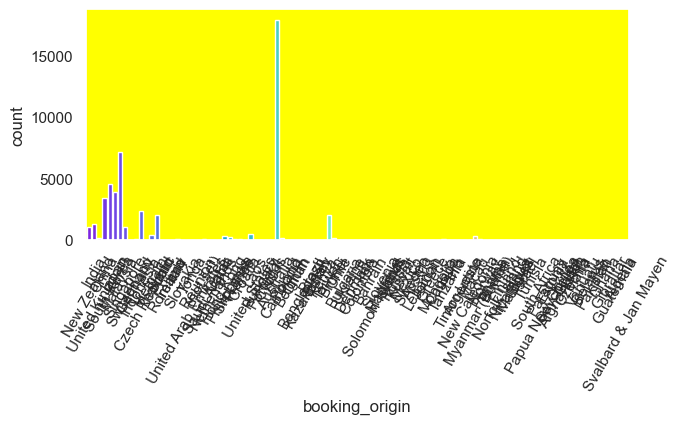

In [10]:
#To visualize the all count plot 
for col in df.select_dtypes(include='object').columns:
    ax=plt.axes()
    ax.set(facecolor='yellow')
    sns.set(rc={'figure.figsize':(7,3)},style='dark')
    sns.countplot(x=col,data=df,palette='rainbow')
    plt.xticks(rotation=60)
    plt.show()

In [53]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

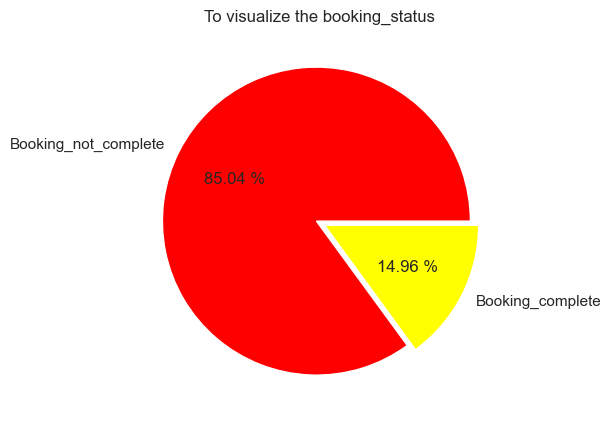

In [26]:
plt.figure(figsize=(10,5))
plt.pie(df['booking_complete'].value_counts(),explode=[0.02,0.04],
    labels=['Booking_not_complete','Booking_complete'],
    colors=['red','yellow'],
    autopct='%1.2f %%')
plt.title('To visualize the booking_status')
plt.show()

In [46]:
#Checking the vaiance_inflation_factor
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def cal_vif(X):
#     vif=pd.DataFrame()
#     vif['variable']=X.columns
#     vif['Vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     vif.sort_values('Vif',ascending=True)
#     return vif
# cal_vif(df)

# Machine Learning 

In [47]:
#import the standard librers for machine Learing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0


In [49]:
#Covert the all categoricall columns to numerical
label=LabelEncoder()
df['sales_channel']=label.fit_transform(df['sales_channel'])
df['trip_type']=label.fit_transform(df['trip_type'])
df['route']=label.fit_transform(df['route'])
df['booking_origin']=label.fit_transform(df['booking_origin'])
#divided the data x and y
X=df.drop(['booking_complete','flight_duration'],axis=1)
y=df['booking_complete']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=120)

The accuracy_score is LogisticRegression() is 85.02
The classification report               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8505
           1       0.00      0.00      0.00      1495

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

[[8502    3]
 [1495    0]]
None


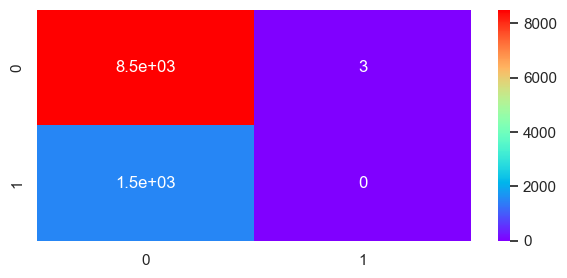

In [50]:
def get_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'The accuracy_score is {model} is {accuracy_score(y_test,y_pred)*100:.2f}')
    print('The classification report',classification_report(y_test,y_pred))
    matrix=confusion_matrix(y_test,y_pred)
    print(matrix)
    sns.heatmap(matrix,annot=True,cmap='rainbow')
#Linear Regression Model
linear=LogisticRegression()
print(get_model(linear,X_train,X_test,y_train,y_test))

The accuracy_score is RandomForestClassifier() is 85.16
The classification report               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8505
           1       0.52      0.09      0.16      1495

    accuracy                           0.85     10000
   macro avg       0.69      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000

[[8376  129]
 [1355  140]]
None


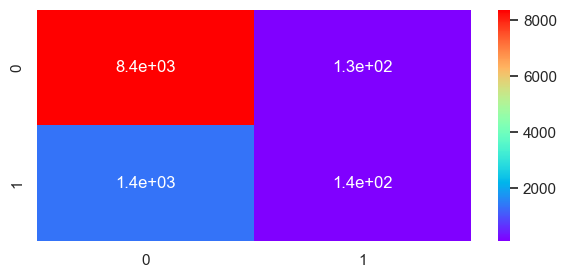

In [51]:
#Linear Regression Model
random=RandomForestClassifier()
print(get_model(random,X_train,X_test,y_train,y_test))

The accuracy_score is DecisionTreeClassifier() is 78.58
The classification report               precision    recall  f1-score   support

           0       0.88      0.87      0.87      8505
           1       0.30      0.32      0.31      1495

    accuracy                           0.79     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.79      0.79      0.79     10000

[[7387 1118]
 [1024  471]]
None


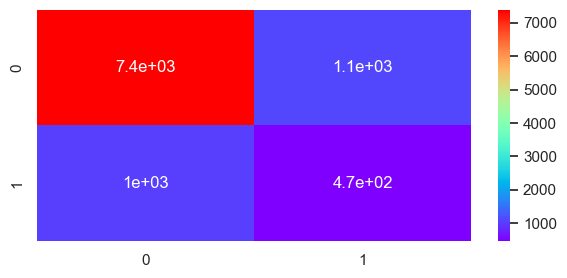

In [52]:
#DecisionTreeClassifier Model
tree=DecisionTreeClassifier()
print(get_model(tree,X_train,X_test,y_train,y_test))

The accuracy_score is SVC() is 85.05
The classification report               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8505
           1       0.00      0.00      0.00      1495

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

[[8505    0]
 [1495    0]]
None


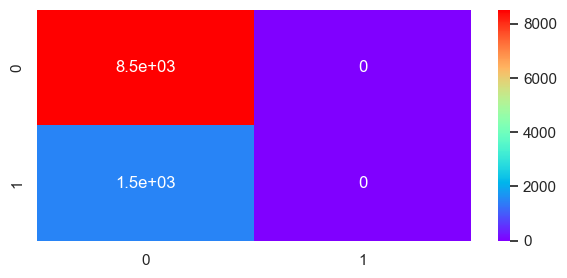

In [54]:
from sklearn.svm import SVC
#SVC Model
svc=SVC()
print(get_model(svc,X_train,X_test,y_train,y_test))

The accuracy_score is KNeighborsClassifier() is 82.98
The classification report               precision    recall  f1-score   support

           0       0.86      0.95      0.90      8505
           1       0.34      0.15      0.21      1495

    accuracy                           0.83     10000
   macro avg       0.60      0.55      0.56     10000
weighted avg       0.79      0.83      0.80     10000

[[8078  427]
 [1275  220]]
None


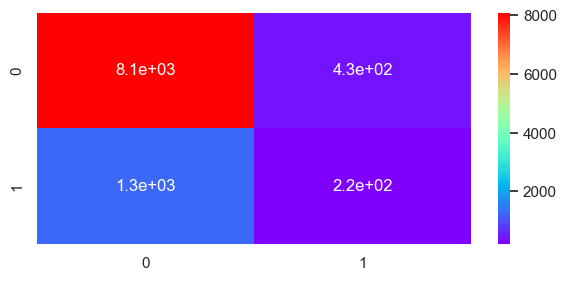

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn_clf = KNeighborsClassifier()
print(get_model(knn_clf,X_train,X_test,y_train,y_test))

# HyperParameter turning

In [55]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  # Fit the random search model
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  
  #fit on train
  random.fit(X_train,y_train)
  # print best_params_
  print(random.best_params_)
  

In [56]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


The accuracy_score is RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200) is 85.06
The classification report               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8505
           1       0.67      0.00      0.00      1495

    accuracy                           0.85     10000
   macro avg       0.76      0.50      0.46     10000
weighted avg       0.82      0.85      0.78     10000

[[8504    1]
 [1493    2]]
None


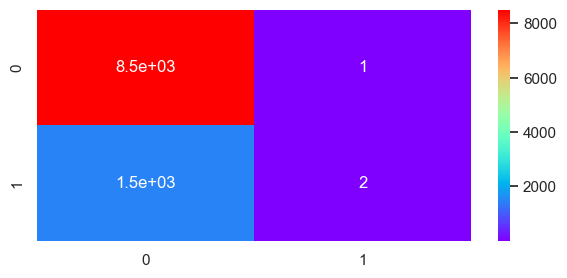

In [58]:
#Linear Regression Model
random=RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True})
print(get_model(random,X_train,X_test,y_train,y_test))

The accuracy_score is KNeighborsClassifier(leaf_size=3, n_neighbors=28) is 84.99
The classification report               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8505
           1       0.47      0.03      0.06      1495

    accuracy                           0.85     10000
   macro avg       0.66      0.51      0.49     10000
weighted avg       0.80      0.85      0.79     10000

[[8448   57]
 [1444   51]]
None


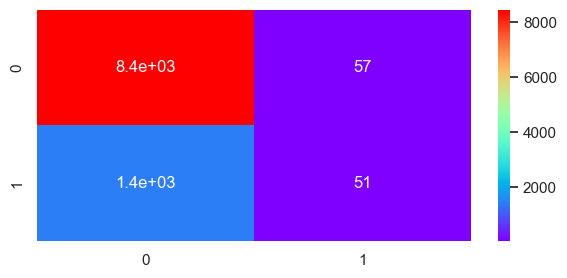

In [63]:


# Instantiate the model
knn_clf = KNeighborsClassifier(**{'n_neighbors': 28, 'leaf_size': 3})
print(get_model(knn_clf,X_train,X_test,y_train,y_test))

The accuracy_score is DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=3) is 85.05
The classification report               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8505
           1       0.00      0.00      0.00      1495

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

[[8505    0]
 [1495    0]]
None


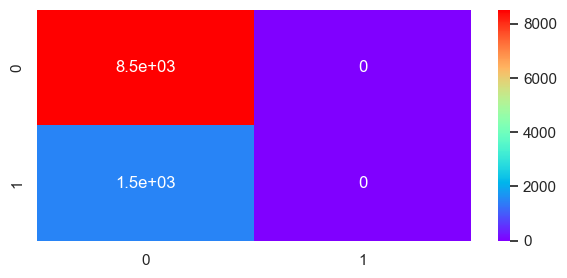

In [64]:
tree=DecisionTreeClassifier(**{'splitter': 'best', 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 3})
print(get_model(tree,X_train,X_test,y_train,y_test))